In [2]:
import os

import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
from dotenv import find_dotenv, load_dotenv

from src.models.models import load_model
from src.data.tf_data import TFDataCreator
from src.data.utils import get_split
from src.models.losses import dice_loss, dice_coefficient_hard
from src.models.utils import config_gpu

load_dotenv(find_dotenv())
%matplotlib inline

In [3]:

task = "Task04_Hippocampus"

In [4]:
model_path = "../models/SLRIUnet__split_0__20221011-133339"

In [5]:
model = load_model(model_path)

2022-10-11 13:37:22,514 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 2
2022-10-11 13:37:22,791 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 2 - done
2022-10-11 13:37:22,804 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 2
2022-10-11 13:37:22,875 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 2 - done
2022-10-11 13:37:22,884 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 4
2022-10-11 13:37:22,924 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 4 - done
2022-10-11 13:37:22,932 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 4
2022-10-11 13:37:22,983 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 4 - done
2022-10-11 13:37:22,989 - src.models.layers_faster - INFO - Initializing SSHConv3D layer with streams: 4
2022-10-11 13:37:23,027 - s

In [6]:
split_id = 0
ids_train = get_split(split_id, os.environ["SPLITPATH"])["training"]
ids_val = get_split(split_id, os.environ["SPLITPATH"])["validation"]
ids_test = get_split(split_id, os.environ["SPLITPATH"])["testing"]

In [7]:
file = h5py.File(f"../data/processed/{task}/{task}_training.hdf5", "r")
data_creator = TFDataCreator.get(task.split("_")[0])(
    file,
    #    patch_size=(128, 128, 128),
    shuffle=True,
    params_augmentation={
        "rotation": False,
        "random_center": False,
    })
ds = data_creator.get_tf_data_with_id(ids_test).batch(4)

In [8]:
x, y, image_id = next(ds.as_numpy_iterator())

In [9]:
x.shape

(4, 64, 64, 64, 1)

In [13]:
y_pred = model(x)

2022-10-11 13:39:51,388 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,431 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,453 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,471 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,509 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,561 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,592 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,639 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:39:51,665 - src.models.layers_faster - INFO - SHCo

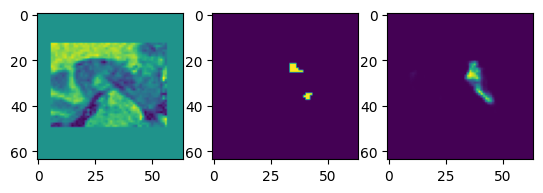

In [11]:
s = 32
b = 3
plt.subplot(1, 3, 1)
plt.imshow(x[b, :, :, s, 0])
plt.subplot(1, 3, 2)
plt.imshow(y[b, :, :, s, 1])
plt.subplot(1, 3, 3)
plt.imshow(y_pred[b, :, :, s, 1])



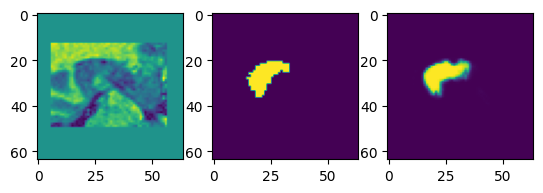

In [12]:
plt.subplot(1, 3, 1)
plt.imshow(x[b, :, :, s, 0])
plt.subplot(1, 3, 2)
plt.imshow(y[b, :, :, s, 2])
plt.subplot(1, 3, 3)
plt.imshow(y_pred[b, :, :, s, 2])



In [ ]:
plt.imshow(y[b, :, :, s, 2])

In [ ]:
model.summary()

In [ ]:
np.unique(y_pred[b, :, :, s, 0])

In [14]:
results = pd.DataFrame()
i = 0
for x, y, image_ids in ds:
    y_pred = model(x).numpy()
    dices_1 = dice_coefficient_hard(y[..., 1], y_pred[..., 1]).numpy()
    dices_2 = dice_coefficient_hard(y[..., 2], y_pred[..., 2]).numpy()
    for b in range(y.shape[0]):
        results = pd.concat([
            results,
            pd.DataFrame(
                {
                    "dice_1": dices_1[b],
                    "dice_2": dices_2[b]
                },
                index=[image_ids[b].numpy().decode("utf-8")],
            )
        ])
        i += 1


2022-10-11 13:55:56,420 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,455 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,475 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,529 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,576 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,604 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,664 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,691 - src.models.layers_faster - INFO - SHConv3D: real filters dtype cast to: <dtype: 'float32'>
2022-10-11 13:55:56,708 - src.models.layers_faster - INFO - SHCo

In [15]:
results.describe()

,dice_1,dice_2
count,52.000000,52.000000
mean,0.840893,0.833731
std,0.055684,0.058375
min,0.639350,0.619767
25%,0.820914,0.805837
50%,0.857026,0.845367
75%,0.875733,0.871081
max,0.909479,0.918750


In [ ]:
results